## Mount the Google Drive onto the Colab as the storage location.

Following the instructions returned from the below cell. You will click a web link and select the google account you want to mount, then copy the authorication code to the blank, press enter.

In [1]:
# This must be run within a Google Colab environment 
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Append the directory location where you upload the start code folder (In this problem, *RLalgs*) to the sys.path

E.g. dir = '/content/drive/My Drive/RL/.', start code folder is inside "RL" folder.

In [2]:
import sys
sys.path.append('/content/gdrive/My Drive/RL/.')
# sys.path.append('</dir/to/start/code/folder/.>')

Your code should remain in the block marked by<br />
\############################<br />
\# YOUR CODE STARTS HERE<br />
\# YOUR CODE ENDS HERE<br />
\############################<br />
Please don't edit anything outside the block.

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import numpy as np
import random
import matplotlib.pyplot as plt
import gym

## 1. Incremental Implementation of Average
We've finished the incremental implementation of average for you. Please call the function estimate with 1/step step size and fixed step size to compare the difference between this two on a simulated Bandit problem.<br />


In [5]:
from RLalgs.utils import estimate
random.seed(6885)
numTimeStep = 10000
q_h = np.zeros(numTimeStep + 1) # Q Value estimate with 1/step step size
q_f = np.zeros(numTimeStep + 1) # Q value estimate with fixed step size
FixedStepSize = 0.5 #A large number to exaggerate the difference
for step in range(1, numTimeStep + 1):
    if step < numTimeStep / 2:
        r = random.gauss(mu = 1, sigma = 0.1)
    else:
        r = random.gauss(mu = 3, sigma = 0.1)
    
    #TIPS: Call function estimate defined in ./RLalgs/utils.py
    ############################
    # YOUR CODE STARTS HERE
    q_h[step] = estimate(q_h[step-1],1/step,r)
    q_f[step] = estimate(q_f[step-1],FixedStepSize,r)
    # YOUR CODE ENDS HERE
    ############################
    
q_h = q_h[1:]
q_f = q_f[1:]

RLalgs is a package containing Reinforcement Learning algorithms Epsilon-Greedy, Policy Iteration, Value Iteration, Q-Learning, and SARSA.


Plot the two Q value estimates. (Please include a title, labels on both axes, and legends)<br />

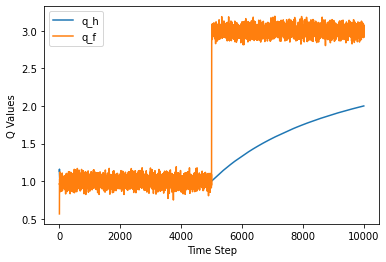

In [6]:
############################
# YOUR CODE STARTS HERE
y1 = q_h
y2 = q_f
plt.plot(np.arange(numTimeStep), y1, label = 'q_h')
plt.plot(np.arange(numTimeStep), y2, label = 'q_f')
plt.xlabel('Time Step')
plt.ylabel('Q Values')
plt.legend()
plt.show()

# YOUR CODE ENDS HERE
############################

## 2. $\epsilon$-Greedy for Exploration
In Reinforcement Learning, we are always faced with the dilemma of exploration and exploitation. $\epsilon$-Greedy is a trade-off between them. You are gonna implement Greedy and $\epsilon$-Greedy. We combine these two policies in one function by treating Greedy as $\epsilon$-Greedy where $\epsilon = 0$. Edit the function epsilon_greedy in ./RLalgs/utils.py.<br />


In [7]:
from RLalgs.utils import epsilon_greedy
np.random.seed(6885) #Set the seed to cancel the randomness
q = np.random.normal(0, 1, size = 5)
############################
# YOUR CODE STARTS HERE
greedy_action = epsilon_greedy(q, 0) #Use epsilon = 0 for Greedy
e_greedy_action = epsilon_greedy(q,0.1) #Use epsilon = 0.1
# YOUR CODE ENDS HERE
############################
print('Values:')
print(q)
print('Greedy Choice =', greedy_action)
print('Epsilon-Greedy Choice =', e_greedy_action)

Values:
[ 0.61264537  0.27923079 -0.84600857  0.05469574 -1.09990968]
Greedy Choice = 0
Epsilon-Greedy Choice = 0


You should get the following results.<br />
Values:<br />
\[ 0.61264537  0.27923079 -0.84600857  0.05469574 -1.09990968\]<br />
Greedy Choice = 0<br />

## 3. Frozen Lake Environment 

In [8]:
env = gym.make('FrozenLake-v1')

### 3.1 Derive Q value from V value
Edit function action_evaluation in ./RLalgs/utils.py.<br />
TIPS: $q(s, a)=\sum_{s',r}p(s',r|s,a)(r+\gamma v(s'))$<br />

In [9]:
from RLalgs.utils import action_evaluation
v = np.ones(16)
q = action_evaluation(env = env.env, gamma = 1, v = v)
print('Action values:')
print(q)

Action values:
[[1.         1.         1.         1.        ]
 [1.         1.         1.         1.        ]
 [1.         1.         1.         1.        ]
 [1.         1.         1.         1.        ]
 [1.         1.         1.         1.        ]
 [1.         1.         1.         1.        ]
 [1.         1.         1.         1.        ]
 [1.         1.         1.         1.        ]
 [1.         1.         1.         1.        ]
 [1.         1.         1.         1.        ]
 [1.         1.         1.         1.        ]
 [1.         1.         1.         1.        ]
 [1.         1.         1.         1.        ]
 [1.         1.         1.         1.        ]
 [1.         1.33333333 1.33333333 1.33333333]
 [1.         1.         1.         1.        ]]


You should get Q values all equal to one except at State 14

Pseudo-codes of the following four algorithms can be found on Page 80, 83, 130, 131 of the Sutton's book.

### 3.2 Model-based RL algorithms

In [10]:
from RLalgs.utils import action_evaluation, action_selection, render

### 3.2.1 Policy Iteration
Edit the function policy_iteration and relevant functions in ./RLalgs/pi.py to implement the Policy Iteration Algorithm.<br />

In [11]:
from RLalgs.pi import policy_iteration
V, policy, numIterations = policy_iteration(env = env.env, gamma = 1, max_iteration = 500, theta = 1e-7)
print('State values:')
print(V)
print('Number of iterations to converge =', numIterations)

State values:
[0.82352774 0.8235272  0.82352682 0.82352662 0.82352791 0.
 0.52941063 0.         0.82352817 0.82352851 0.76470509 0.
 0.         0.88235232 0.94117615 0.        ]
Number of iterations to converge = 7


You should get values close to:<br />
State values:<br />
\[0.82352774 0.8235272  0.82352682 0.82352662 0.82352791 0.<br />
0.52941063 0.         0.82352817 0.82352851 0.76470509 0.<br />0.         0.88235232 0.94117615 0.\]

In [52]:
#Uncomment and run the following to evaluate your result, comment them when you generate the pdf
#Q = action_evaluation(env = env.env, gamma = 1, v = V)
#policy_estimate = action_selection(Q)
#render(env, policy_estimate)

### 3.2.2 Value Iteration
Edit the function value_iteration and relevant functions in ./RLalgs/vi.py to implement the Value Iteration Algorithm.<br />

In [12]:
from RLalgs.vi import value_iteration
V, policy, numIterations = value_iteration(env = env.env, gamma = 1, max_iteration = 500, theta = 1e-7)
print('State values:')
print(V)
print('Number of iterations to converge =', numIterations)

State values:
[0.82352937 0.82352936 0.82352935 0.82352935 0.82352938 0.
 0.52941174 0.         0.82352938 0.82352939 0.76470586 0.
 0.         0.88235293 0.94117646 0.        ]
Number of iterations to converge = 500


You should get values close to:<br />
State values:<br />
\[0.82352773 0.82352718  0.8235268 0.8235266 0.8235279 0.<br />
0.52941062 0.         0.82352816 0.8235285 0.76470509 0.<br />0.         0.88235231 0.94117615 0.\]

In [ ]:
#Uncomment and run the following to evaluate your result, comment them when you generate the pdf
#Q = action_evaluation(env = env.env, gamma = 1, v = V)
#policy_estimate = action_selection(Q)
#render(env, policy_estimate)

### 3.3 Model free RL algorithms

### 3.3.1 Q-Learning
Edit the function QLearning in ./RLalgs/ql.py to implement the Q-Learning Algorithm.<br />

In [14]:
from RLalgs.ql import QLearning
Q = QLearning(env = env.env, num_episodes = 1000, gamma = 1, lr = 0.1, e = 0.1)
print('Action values:')
print(Q)

Action values:
[[0.27495168 0.11447515 0.1440366  0.09456157]
 [0.04787668 0.11030049 0.00534849 0.01721119]
 [0.02033644 0.10776446 0.03926204 0.0197736 ]
 [0.05673026 0.01105529 0.00598546 0.01150785]
 [0.28902598 0.06238357 0.12446953 0.0851048 ]
 [0.         0.         0.         0.        ]
 [0.06445695 0.00662628 0.1025657  0.01121817]
 [0.         0.         0.         0.        ]
 [0.07742679 0.06008138 0.02624229 0.31471038]
 [0.02322962 0.35242292 0.11929348 0.05763229]
 [0.31739597 0.15489291 0.07188574 0.06213676]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.1093972  0.31346873 0.45350831 0.1788256 ]
 [0.23223038 0.25733667 0.27648376 0.60552523]
 [0.         0.         0.         0.        ]]


Generally, you should get non-zero action values on non-terminal states.

In [ ]:
#Uncomment the following to evaluate your result, comment them when you generate the pdf
#env = gym.make('FrozenLake-v1')
#policy_estimate = action_selection(Q)
#render(env, policy_estimate)

### 3.3.2 SARSA
Edit the function SARSA in ./RLalgs/sarsa.py to implement the SARSA Algorithm.<br />

In [17]:
from RLalgs.sarsa import SARSA
Q = SARSA(env = env.env, num_episodes = 1000, gamma = 1, lr = 0.1, e = 0.1)
print('Action values:')
print(Q)

Action values:
[[0.01795687 0.02711272 0.05195552 0.00949569]
 [0.01105018 0.01693622 0.0062744  0.0502714 ]
 [0.05563381 0.04957945 0.07203931 0.03871152]
 [0.03895344 0.03664733 0.02514024 0.06863669]
 [0.06302563 0.01107141 0.01637326 0.00458328]
 [0.         0.         0.         0.        ]
 [0.05938421 0.05928103 0.05955968 0.03506446]
 [0.         0.         0.         0.        ]
 [0.0147726  0.04607198 0.02512533 0.0943063 ]
 [0.03678232 0.19270621 0.04088879 0.01029397]
 [0.22570166 0.0121902  0.07933813 0.00896049]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.0091253  0.20923752 0.02927684 0.1083489 ]
 [0.15061143 0.31659146 0.4868246  0.34165985]
 [0.         0.         0.         0.        ]]


Generally, you should get non-zero action values on non-terminal states.

In [ ]:
#Uncomment the following to evaluate your result, comment them when you generate the pdf
#env = gym.make('FrozenLake-v1')
#policy_estimate = action_selection(Q)
#render(env, policy_estimate)

### 3.4 Human
You can play this game if you are interested. See if you can get the frisbee either with or without the model.

In [ ]:
from RLalgs.utils import human_play
#Uncomment and run the following to play the game, comment it when you generate the pdf
#env = gym.make('FrozenLake-v1')
#human_play(env)

## 4. Exploration VS. Exploitation
Try to reproduce Figure 2.2 (the upper one is enough) of the Sutton's book based on the experiment described in [Chapter 2.3](http://incompleteideas.net/book/RLbook2020.pdf).<br />

In [18]:
# Do the experiment and record average reward acquired in each time step
############################
# YOUR CODE STARTS HERE

eps = [0.1,0.01,0] # different epsilons for eps-greedy algorithm to match those in figure
num_band = 1000 # number of bandits 
num_arms = 10 # number of arms
rewards = [[],[],[]] # cosidering 3 separate epsilon values, we create 3 empty lists to save the averages
actual = np.random.normal(0,1,(num_band,num_arms)) # actual rewards for selecting an action

for iter in range(len(eps)):
  est = np.zeros((num_band,num_arms)) # intialize estimated rewards 
  num_pulls = np.zeros((num_band,num_arms)) # initialize number of times an arm is pulled	

  for pull in range(1,num_band+1): # pull for as many bandits as we have, higher the more it matches initial graph
    r_now = [] # all rewards in this pull

    for i in range(num_band): 
      if np.random.random() < eps[iter]: # decide whether to explore or exploit based on a random number
        arm = np.random.randint(num_arms) # explore						
      else : 
        arm = np.argmax(est[i]) # exploit

      r_now.append(np.random.normal(actual[i][arm],1)) # append current pull rewards
      num_pulls[i][arm] = num_pulls[i][arm]+1 # iterate the chose number pull number for average calculation
      est[i][arm] = est[i][arm] + (np.random.normal(actual[i][arm],1) - est[i][arm])/num_pulls[i][arm] # update the estimated reward for use in future pulls 
    
    avg_reward = np.mean(r_now)		
    rewards[iter].append(avg_reward)
# YOUR CODE ENDS HERE
############################

You should get curves similar to that in the book.

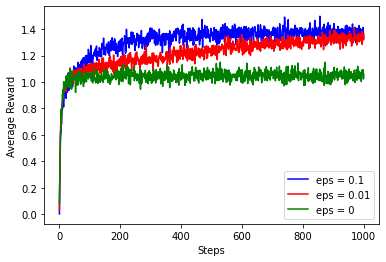

In [19]:
# Plot the average reward
############################
# YOUR CODE STARTS HERE

x = range(1,1001)
plt.plot(x, rewards[0], 'b', label = 'eps = 0.1')
plt.plot(x, rewards[1], 'r', label = 'eps = 0.01')
plt.plot(x, rewards[2], 'g', label = 'eps = 0')
plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.legend()
plt.show()

# YOUR CODE ENDS HERE
############################